In [173]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn import model_selection

In [524]:
pd.set_option('display.max_columns', 500)

In [525]:
df = pd.read_csv('./aramco/data/CNS_gas_train.csv')
df_test = pd.read_csv('./aramco/data/CNS_gas_test.csv')

In [526]:
descr = df.iloc[0]
df = df.iloc[1:]

In [527]:
descr

Country                                        NaN
WELL_NAME                                Well name
OGA Well Name                            Well name
WH_SITETYPE                              Site type
WH_FIELD                                Field name
WH_BLOCK                                Block name
WH_LAT                                    Latitude
WH_LONG                                  Longitude
WH_COORD_SYS                          Location CRS
WH_OPERATOR                               Operator
WH_SPUD_DATE                             Spud date
WH_SPUD_YEAR                             Spud year
WH_COMP_DATE                       Completion date
WH_TD_M                           Target depth (m)
WH_DR_ELEV_M           Derrick floor elevation (m)
WH_DEPTH_REF                       Depth reference
WH_WATER_DEPTH_M                   Water depth (m)
SAMPLE_ID                              Sample code
SH_DEPTH_TOP_FT                  Top depth in feet
SH_DEPTH_BOT_FT                

In [528]:
df.columns

Index(['Country', 'WELL_NAME', 'OGA Well Name', 'WH_SITETYPE', 'WH_FIELD',
       'WH_BLOCK', 'WH_LAT', 'WH_LONG', 'WH_COORD_SYS', 'WH_OPERATOR',
       'WH_SPUD_DATE', 'WH_SPUD_YEAR', 'WH_COMP_DATE', 'WH_TD_M',
       'WH_DR_ELEV_M', 'WH_DEPTH_REF', 'WH_WATER_DEPTH_M', 'SAMPLE_ID',
       'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT', 'SH_SAMPLE_TYPE',
       'SH_SAMPLE_SUB_TYPE', 'SH_ORIG', 'SH_ORIG_DESC', 'SH_TREATMENT',
       'SH_TREATMENT_DESC', 'SH_LITH', 'SH_AGE', 'SH_AGE_BOT', 'SH_FORM',
       'SH_FORM_BOT', 'SH_CDATE', 'SH_COMMENT', 'SAMPLE_ID_GM',
       'SAMPLE_ID_GDB', 'SAMPLE_ID_SAM', 'EXT_SAMPLE_VENDOR', 'SAMPLE_ID_EXT',
       'GAS_METHOD', 'GAS_LAB', 'GAS_ACQ_DATE', 'GAS_TOTAL_CONCENTRATION',
       'GAS_AIR', 'GAS_C1', 'GAS_C2', 'C2_UNSAT', 'GAS_C3', 'C3_UNSAT',
       'GAS_IC4', 'GAS_NC4', 'C4_UNSAT', 'GAS_NEOC5', 'GAS_IC5', 'GAS_NC5',
       'C5_UNSAT', 'GAS_NC5_PLUS', 'GAS_C6PLUS', 'GAS_O2', 'GAS_CO2', 'GAS_H2',
       'GAS_H2S', 'GAS_HE', 'GAS_N2', 'D_G_METHOD', 'D_G_LAB'

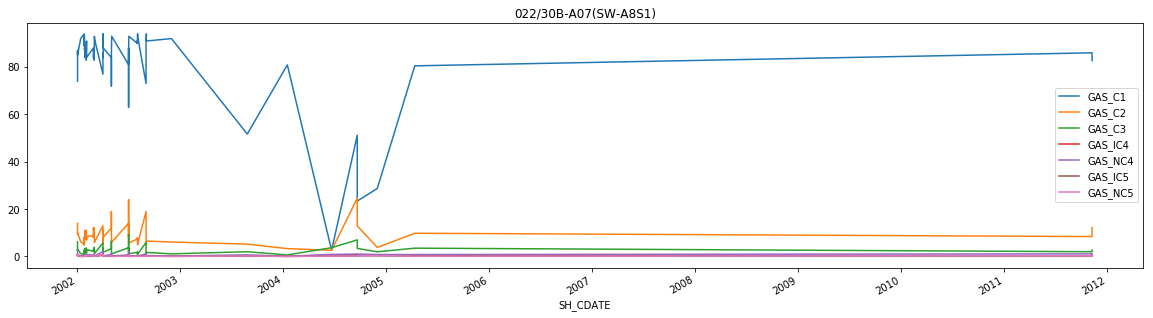

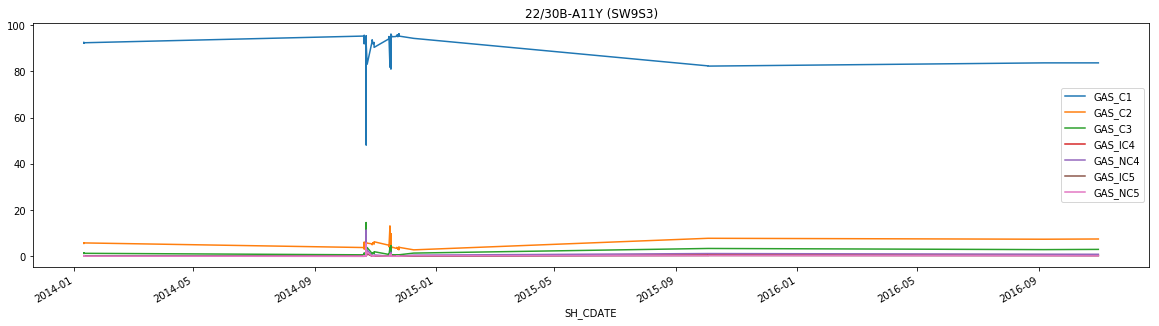

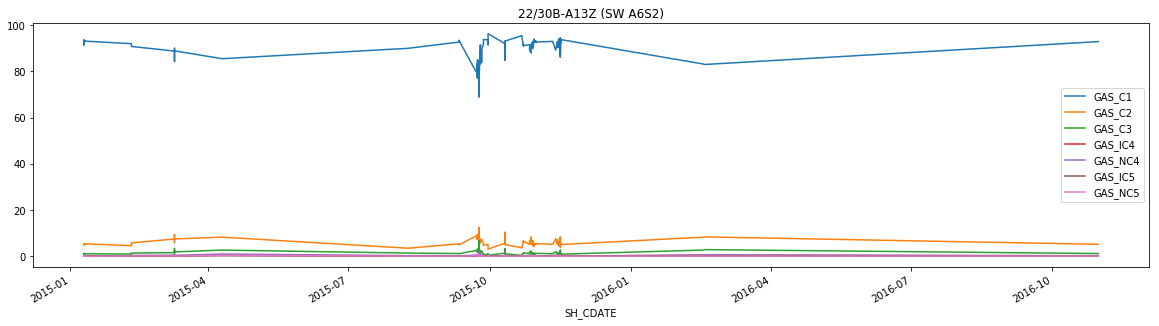

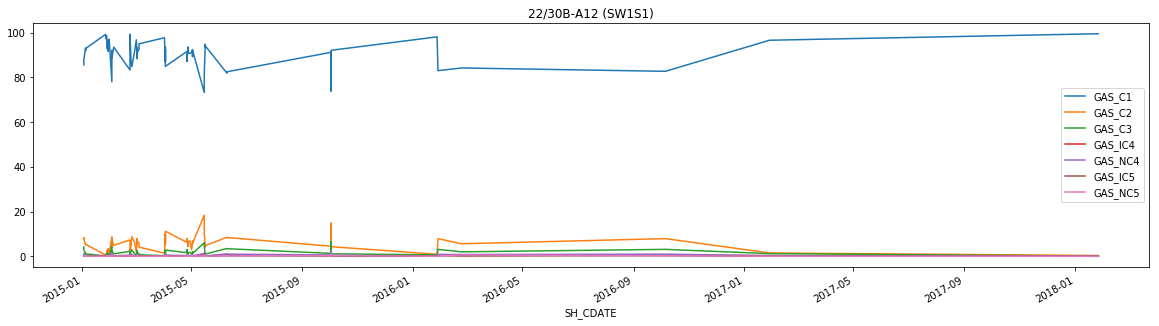

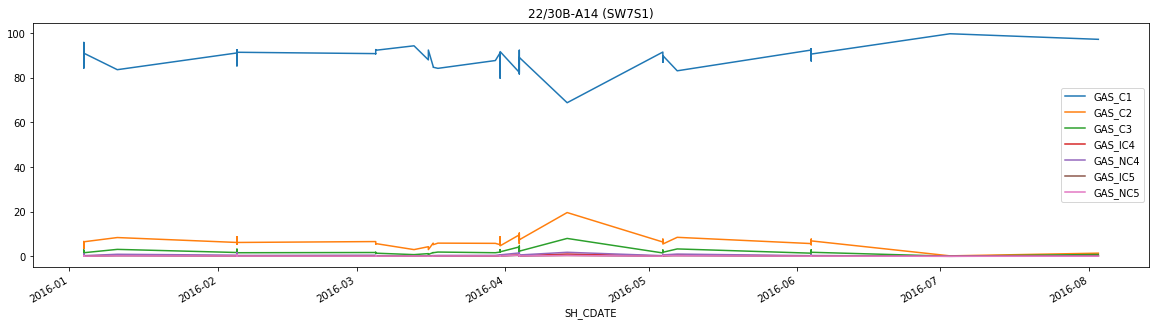

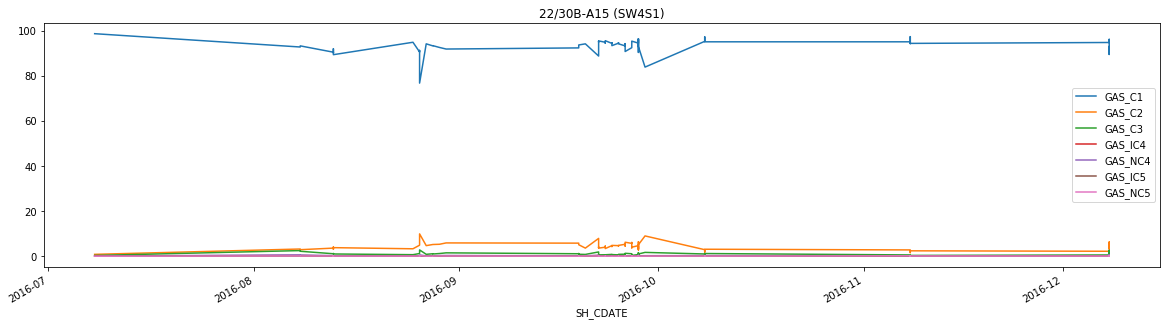

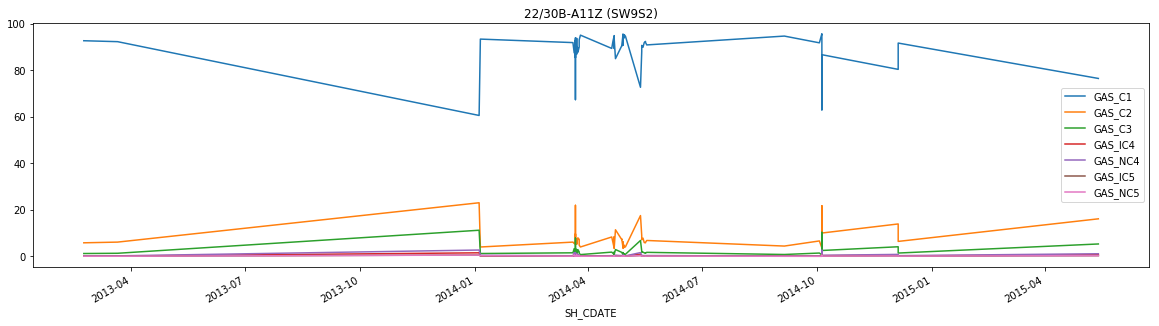

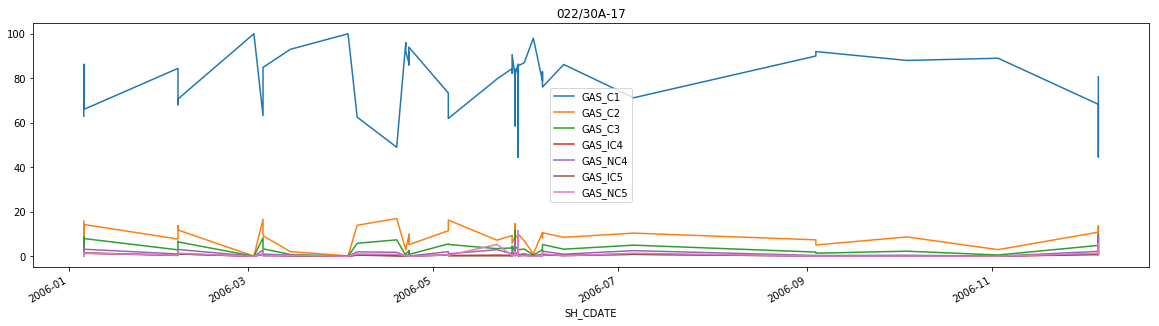

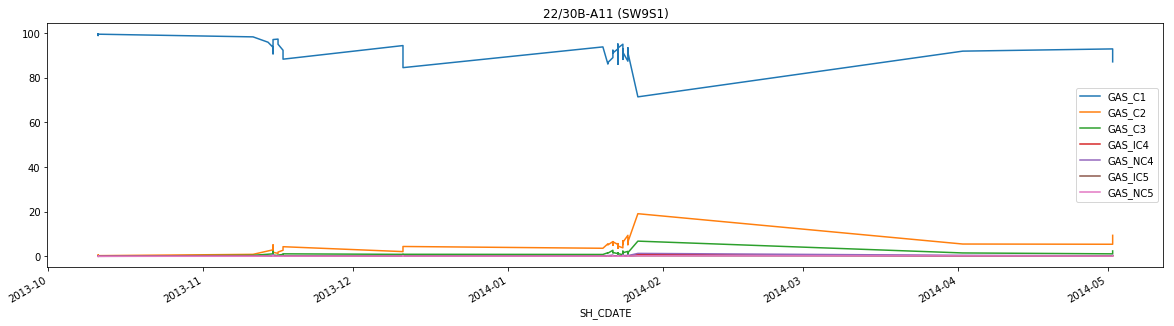

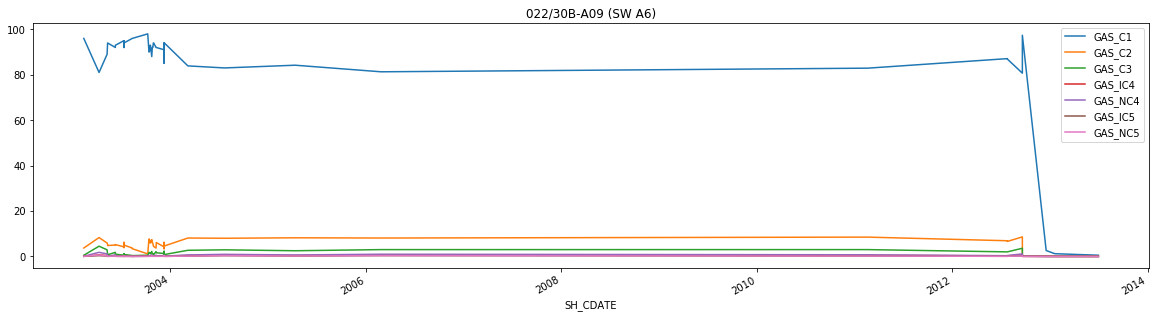

In [529]:
for name in df['WELL_NAME'].value_counts()[:10].index:
    plt.figure(figsize=(20, 5))
    plt.title(name)
    for y in y_cols:
        well = df[df['WELL_NAME'] == name].copy()
        well = well[~well['SH_CDATE'].isnull()]
        well['SH_CDATE'] = pd.to_datetime(well['SH_CDATE'])
        well = well.set_index('SH_CDATE')
        well[y].astype(float).plot()
        plt.legend()

In [530]:
first_cols = ['SAMPLE_ID', 'C2_UNSAT', 'C3_UNSAT', 'WH_TD_M', 'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT',
              'SH_SAMPLE_SUB_TYPE', 'GAS_METHOD', 'WH_LAT', 'WH_LONG', 'WH_SITETYPE', 'SH_ORIG']
['GAS_CO2', 'SH_CDATE', 'WH_SPUD_DATE', 'WH_COMP_DATE', 'SH_FORM']
y_cols = ['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5']

In [531]:
df = df[~df['SAMPLE_ID'].duplicated()]

df = df[~(df['WH_LONG'] == 'World Geodetic System 1984')]


df_train = df[first_cols]
# df_train = df_train[~df_train['SAMPLE_ID'].duplicated()]

In [532]:
df.shape, df_train.shape

((1654, 91), (1654, 12))

In [533]:
df_train[['SH_ORIG']].isnull().any(axis=1).mean()

0.05804111245465538

In [534]:
df_train['SH_ORIG'].value_counts()

ISOT    1342
ANUL     100
UNKN      79
SEPR      22
DST        6
ROV        3
MDT        3
HEAD       2
Anul       1
Name: SH_ORIG, dtype: int64

In [535]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['GAS_METHOD'], prefix='GAS_METHOD')],
                     axis=1).drop(columns=['GAS_METHOD'])
df_train = pd.concat([df_train, pd.get_dummies(df_train['SH_SAMPLE_SUB_TYPE'], prefix='SUB_TYPE')],
                     axis=1).drop(columns=['SUB_TYPE_Unspecified', 'SH_SAMPLE_SUB_TYPE'])
df_train = pd.concat([df_train, pd.get_dummies(df_train['WH_SITETYPE'])],
                     axis=1).drop(columns=['WH_SITETYPE', 'FIELD'])
df_train = pd.concat([df_train, pd.get_dummies(df_train['SH_ORIG'])],
                     axis=1).drop(columns=['SH_ORIG'])

In [536]:
df_train.isnull().mean()

SAMPLE_ID                       0.000000
C2_UNSAT                        0.290206
C3_UNSAT                        0.330109
WH_TD_M                         0.232164
SH_DEPTH_TOP_FT                 0.000000
SH_DEPTH_BOT_FT                 0.000000
WH_LAT                          0.017533
WH_LONG                         0.017533
GAS_METHOD_Air corrected        0.000000
GAS_METHOD_Not Air corrected    0.000000
GAS_METHOD_Not air corrected    0.000000
GAS_METHOD_Not corrected        0.000000
GAS_METHOD_UNKNOWN              0.000000
SUB_TYPE_Headspace              0.000000
SUB_TYPE_Mudgas                 0.000000
SUB_TYPE_Subsurface             0.000000
SUB_TYPE_Surface                0.000000
WELL                            0.000000
ANUL                            0.000000
Anul                            0.000000
DST                             0.000000
HEAD                            0.000000
ISOT                            0.000000
MDT                             0.000000
ROV             

In [537]:
df_train = df_train[~(df_train['WH_LONG'] == 'World Geodetic System 1984')]

In [538]:
df_train['WH_LAT'] = df_train['WH_LAT'].fillna(df_train['WH_LAT'].astype(float).mean()).astype(float)
df_train['WH_LONG'] = df_train['WH_LONG'].fillna(df_train['WH_LONG'].astype(float).mean()).astype(float)
df_train['C2_UNSAT'] = df_train['C2_UNSAT'].fillna(df_train['C2_UNSAT'].astype(float).mean()).astype(float)
df_train['C2_UNSAT'] = df_train['C2_UNSAT'].fillna(df_train['C2_UNSAT'].astype(float).mean()).astype(float)
df_train['C3_UNSAT'] = df_train['C3_UNSAT'].fillna(df_train['C3_UNSAT'].astype(float).mean()).astype(float)
df_train['WH_TD_M'] = df_train['WH_TD_M'].fillna(df_train['WH_TD_M'].astype(float).mean()).astype(float)

In [539]:
df_train = df_train.drop(columns=['SAMPLE_ID'])

In [540]:
df_train.isnull().any(axis=1).mean()

0.0

In [541]:
# X_train, X_test, y_train, y_test = model_selection.train_test_split(df_train, df[y_cols[0]], test_size=0.2)
X_train_, y_train = df_train.astype(float), df[y_cols[0]].astype(float)

## scaler

In [348]:
from sklearn.preprocessing import StandardScaler

In [349]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)

## elastic net

In [489]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score, LeaveOneOut
from sklearn.metrics import mean_absolute_error

In [490]:
parameters = {'alpha': np.logspace(-3, 0, 20), 'l1_ratio': np.linspace(0, 1, 5)}
reg = ElasticNet()
search = GridSearchCV(reg, parameters, scoring='neg_mean_absolute_error', cv=5, verbose=5)
search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=0.001, l1_ratio=0.0 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.0, score=-8.716667185582534, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=0.001, l1_ratio=0.0 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.0, score=-10.975504062152115, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=0.001, l1_ratio=0.0 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.0, score=-8.919518604455805, total=   0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV] alpha=0.001, l1_ratio=0.0 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.0, score=-7.245830348972745, total=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] alpha=0.001, l1_ratio=0.0 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.0, score=-10.991368540147803, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.25 ......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.25, score=-8.71663982864756, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.25 ......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.25, score=-10.974882532618352, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.25 ......................................
[CV]  alpha=0.001, l1_ratio=0.25, score=-8.921292656493291, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.25 ......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.25, score=-7.24123599031547, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.25 ......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.25, score=-10.995461124833746, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.5 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.5, score=-8.716345867380056, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.5 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.5, score=-10.974294945314254, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.5 .......................................
[CV]  alpha=0.001, l1_ratio=0.5, score=-8.923286152616338, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.5 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.5, score=-7.236079724078592, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.5 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.5, score=-10.999652177979119, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.75 ......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.75, score=-8.71581093651085, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.75 ......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.75, score=-10.973755803575525, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.75 ......................................
[CV]  alpha=0.001, l1_ratio=0.75, score=-8.926508464097227, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.75 ......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.75, score=-7.230036052216682, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.75 ......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=0.75, score=-11.004036056877656, total=   0.0s
[CV] alpha=0.001, l1_ratio=1.0 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=1.0, score=-8.714960366247825, total=   0.0s
[CV] alpha=0.001, l1_ratio=1.0 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=1.0, score=-10.973241135709548, total=   0.0s
[CV] alpha=0.001, l1_ratio=1.0 .......................................
[CV]  alpha=0.001, l1_ratio=1.0, score=-8.928309578329225, total=   0.0s
[CV] alpha=0.001, l1_ratio=1.0 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=1.0, score=-7.223916862038834, total=   0.0s
[CV] alpha=0.001, l1_ratio=1.0 .......................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.001, l1_ratio=1.0, score=-11.008663448027152, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.0 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.0, score=-8.71472300853469, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.0 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.0, score=-10.975789266818985, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.0 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.0, score=-8.917054609037486, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.0 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.0, score=-7.255905796146766, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.0 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.0, score=-10.979641072100073, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.25 ......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.25, score=-8.7152691183614, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.25 ......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.25, score=-10.97450203144009, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.25 ......................
[CV]  alpha=0.0014384498882876629, l1_ratio=0.25, score=-8.919168924834649, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.25 ......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.25, score=-7.250095131531263, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.25 ......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.25, score=-10.98520914100969, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.5 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.5, score=-8.7154735764486, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.5 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.5, score=-10.973642691804468, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.5 .......................
[CV]  alpha=0.0014384498882876629, l1_ratio=0.5, score=-8.920652189987155, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.5 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.5, score=-7.243228110620689, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.5 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.5, score=-10.990912452072175, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.75 ......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.75, score=-8.715323479101292, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.75 ......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.75, score=-10.972837220142962, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.75 ......................
[CV]  alpha=0.0014384498882876629, l1_ratio=0.75, score=-8.923600775608193, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.75 ......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.75, score=-7.23601418917226, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=0.75 ......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=0.75, score=-10.996916785483815, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=1.0 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=1.0, score=-8.714421766141605, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=1.0 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=1.0, score=-10.97208658703037, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=1.0 .......................
[CV]  alpha=0.0014384498882876629, l1_ratio=1.0, score=-8.927110251575835, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=1.0 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=1.0, score=-7.229280771787279, total=   0.0s
[CV] alpha=0.0014384498882876629, l1_ratio=1.0 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0014384498882876629, l1_ratio=1.0, score=-11.00333879867574, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.0, score=-8.710890982585372, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.0, score=-10.97684475156357, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.0, score=-8.914311491069101, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.0, score=-7.269114651152195, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.0, score=-10.963502117085275, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.25 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.25, score=-8.712324704312877, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.25 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.25, score=-10.97486389177397, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.25 ........................
[CV]  alpha=0.00206913808111479, l1_ratio=0.25, score=-8.916305255463488, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.25 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.25, score=-7.262078119575703, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.25 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.25, score=-10.971169575610295, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.5 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.5, score=-8.713465973512694, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.5 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.5, score=-10.972996052410737, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.5 .........................
[CV]  alpha=0.00206913808111479, l1_ratio=0.5, score=-8.917817491273627, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.5 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.5, score=-7.25347524242159, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.5 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.5, score=-10.978846896225235, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.75 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.75, score=-8.714214199135228, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.75 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.75, score=-10.97153549404761, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.75 ........................
[CV]  alpha=0.00206913808111479, l1_ratio=0.75, score=-8.92043233003358, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.75 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.75, score=-7.246131087351676, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=0.75 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=0.75, score=-10.986881530626961, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=1.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=1.0, score=-8.713647016877667, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=1.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=1.0, score=-10.97043743411731, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=1.0 .........................
[CV]  alpha=0.00206913808111479, l1_ratio=1.0, score=-8.925385813916131, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=1.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=1.0, score=-7.237268321689298, total=   0.0s
[CV] alpha=0.00206913808111479, l1_ratio=1.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00206913808111479, l1_ratio=1.0, score=-10.99567973833343, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.0, score=-8.704699251599392, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.0, score=-10.978409095112355, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.0, score=-8.911007843788724, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.0, score=-7.286497457900091, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.0, score=-10.9412341144478, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.25 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.25, score=-8.707248823252211, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.25 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.25, score=-10.975515769169538, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.25 .......................
[CV]  alpha=0.002976351441631319, l1_ratio=0.25, score=-8.912836882353806, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.25 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.25, score=-7.2781151715064185, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.25 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.25, score=-10.95157599297773, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.5 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.5, score=-8.709620223534086, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.5 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.5, score=-10.972822370985735, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.5 ........................
[CV]  alpha=0.002976351441631319, l1_ratio=0.5, score=-8.914285756504087, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.5 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.5, score=-7.268425142156399, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.5 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.5, score=-10.962279135299772, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.75 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.75, score=-8.711940105304992, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.75 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.75, score=-10.970147563557699, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.75 .......................
[CV]  alpha=0.002976351441631319, l1_ratio=0.75, score=-8.916910789848865, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.75 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.75, score=-7.259850792073409, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=0.75 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=0.75, score=-10.973194026880387, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=1.0, score=-8.71254911894563, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=1.0, score=-10.96806520909287, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=1.0 ........................
[CV]  alpha=0.002976351441631319, l1_ratio=1.0, score=-8.923261039159136, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=1.0, score=-7.248954049210611, total=   0.0s
[CV] alpha=0.002976351441631319, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.002976351441631319, l1_ratio=1.0, score=-10.984663341389323, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.0, score=-8.694977158610362, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.0, score=-10.980782974150788, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.0, score=-8.906703557538172, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.0, score=-7.308344717387639, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.0, score=-10.910443169219738, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.25 .......................
[CV]  alpha=0.004281332398719396, l1_ratio=0.25, score=-8.699042402765393, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.25 .......................
[CV]  alpha=0.004281332398719396, l1_ratio=0.25, score=-10.976652874065708, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.25 .......................
[CV]  alpha=0.004281332398719396, l1_ratio=0.25, score=-8.908398706409097, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.25 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.25, score=-7.298979493253766, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.25 .......................
[CV]  alpha=0.004281332398719396, l1_ratio=0.25, score=-10.923336715554887, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.5 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.5, score=-8.703242364050556, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.5 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.5, score=-10.972628203612496, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.5 ........................
[CV]  alpha=0.004281332398719396, l1_ratio=0.5, score=-8.909870777050443, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.5 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.5, score=-7.288476046343607, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.5 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.5, score=-10.938986206022795, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.75 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.75, score=-8.707885536476487, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.75 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.75, score=-10.96870844636087, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.75 .......................
[CV]  alpha=0.004281332398719396, l1_ratio=0.75, score=-8.912420238860811, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.75 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.75, score=-7.278595764355291, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=0.75 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=0.75, score=-10.954096196377508, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=1.0, score=-8.711252653379558, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=1.0, score=-10.965041250424354, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=1.0 ........................
[CV]  alpha=0.004281332398719396, l1_ratio=1.0, score=-8.920243734965661, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=1.0, score=-7.265847590073659, total=   0.0s
[CV] alpha=0.004281332398719396, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.004281332398719396, l1_ratio=1.0, score=-10.969529357928886, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=0.0, score=-8.68105339716512, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=0.0, score=-10.983806852402095, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=0.0, score=-8.90086726539226, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=0.0, score=-7.334875794126166, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=0.0, score=-10.868101119152008, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.25 .......................
[CV]  alpha=0.006158482110660267, l1_ratio=0.25, score=-8.686191384432746, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.25 .......................
[CV]  alpha=0.006158482110660267, l1_ratio=0.25, score=-10.978434214012411, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.25 .......................
[CV]  alpha=0.006158482110660267, l1_ratio=0.25, score=-8.902496299500623, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.25 .......................
[CV]  alpha=0.006158482110660267, l1_ratio=0.25, score=-7.324983367137318, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.25 .......................
[CV]  alpha=0.006158482110660267, l1_ratio=0.25, score=-10.885010967265188, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.5 ........................
[CV]  alpha=0.006158482110660267, l1_r

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=0.75, score=-10.966842896617468, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.75 .......................
[CV]  alpha=0.006158482110660267, l1_ratio=0.75, score=-8.906586422391289, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.75 .......................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=0.75, score=-7.303554908059758, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=0.75 .......................
[CV]  alpha=0.006158482110660267, l1_ratio=0.75, score=-10.927058033432655, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=1.0 ........................
[CV]  alpha=0.006158482110660267, l1_ratio=1.0, score=-8.708346423638556, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=1.0, score=-10.96135559606788, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=1.0 ........................
[CV]  alpha=0.006158482110660267, l1_ratio=1.0, score=-8.915883772705737, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=1.0, score=-7.290745436714523, total=   0.0s
[CV] alpha=0.006158482110660267, l1_ratio=1.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.006158482110660267, l1_ratio=1.0, score=-10.947784887554654, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.008858667904100823, l1_ratio=0.0, score=-8.662365257656177, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.008858667904100823, l1_ratio=0.0, score=-10.989829485823002, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.008858667904100823, l1_ratio=0.0, score=-8.892850333641482, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.008858667904100823, l1_ratio=0.0, score=-7.365993232354808, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.008858667904100823, l1_ratio=0.0, score=-10.814304052536302, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.25 .......................
[CV]  alpha=0.008858667904100823, l1_ratio=0.25, score=-8.669047493663316, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.25 .......................
[CV]  alpha=0.008858667904100823, l1_ratio=0.25, score=-10.98150667767276, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.25 .......................
[CV]  alpha=0.008858667904100823, l1_ratio=0.25, score=-8.894459604089025, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.25 .......................
[CV]  alpha=0.008858667904100823, l1_ratio=0.25, score=-7.356283138686945, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.25 .......................
[CV]  alpha=0.008858667904100823, l1_ratio=0.25, score=-10.832908869513805, total=   0.0s
[CV] alpha=0.008858667904100823, l1_ratio=0.5 ........................
[CV]  alpha=0.008858667904100823, l1_ra

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.012742749857031334, l1_ratio=0.0, score=-8.637955780436577, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.012742749857031334, l1_ratio=0.0, score=-10.996478082220616, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.012742749857031334, l1_ratio=0.0, score=-8.88179412014893, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.012742749857031334, l1_ratio=0.0, score=-7.404834046881696, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.012742749857031334, l1_ratio=0.0, score=-10.748488968897707, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.25 .......................
[CV]  alpha=0.012742749857031334, l1_ratio=0.25, score=-8.64645539969587, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.25 .......................
[CV]  alpha=0.012742749857031334, l1_ratio=0.25, score=-10.986086754950868, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.25 .......................
[CV]  alpha=0.012742749857031334, l1_ratio=0.25, score=-8.883365019338449, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.25 .......................
[CV]  alpha=0.012742749857031334, l1_ratio=0.25, score=-7.397457161141371, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.25 .......................
[CV]  alpha=0.012742749857031334, l1_ratio=0.25, score=-10.769123578986818, total=   0.0s
[CV] alpha=0.012742749857031334, l1_ratio=0.5 ........................
[CV]  alpha=0.012742749857031334, l1_ra

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.018329807108324356, l1_ratio=0.0, score=-8.605261244280136, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.018329807108324356, l1_ratio=0.0, score=-11.00485279486225, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.018329807108324356, l1_ratio=0.0, score=-8.866514076573875, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.018329807108324356, l1_ratio=0.0, score=-7.449339075615582, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.018329807108324356, l1_ratio=0.0, score=-10.662013770174593, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.25 .......................
[CV]  alpha=0.018329807108324356, l1_ratio=0.25, score=-8.616362195620741, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.25 .......................
[CV]  alpha=0.018329807108324356, l1_ratio=0.25, score=-10.99059550762066, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.25 .......................
[CV]  alpha=0.018329807108324356, l1_ratio=0.25, score=-8.867978757151619, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.25 .......................
[CV]  alpha=0.018329807108324356, l1_ratio=0.25, score=-7.445010975332653, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.25 .......................
[CV]  alpha=0.018329807108324356, l1_ratio=0.25, score=-10.688536943774324, total=   0.0s
[CV] alpha=0.018329807108324356, l1_ratio=0.5 ........................
[CV]  alpha=0.018329807108324356, l1_ra

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.026366508987303583, l1_ratio=0.0, score=-8.56159261060418, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.026366508987303583, l1_ratio=0.0, score=-11.015843945725294, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.026366508987303583, l1_ratio=0.0, score=-8.845339176056171, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.026366508987303583, l1_ratio=0.0, score=-7.496342075474879, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.0 ........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.026366508987303583, l1_ratio=0.0, score=-10.549605027355698, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.25 .......................
[CV]  alpha=0.026366508987303583, l1_ratio=0.25, score=-8.575766584187551, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.25 .......................
[CV]  alpha=0.026366508987303583, l1_ratio=0.25, score=-10.997671279550486, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.25 .......................
[CV]  alpha=0.026366508987303583, l1_ratio=0.25, score=-8.846558924796364, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.25 .......................
[CV]  alpha=0.026366508987303583, l1_ratio=0.25, score=-7.496178213086047, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.25 .......................
[CV]  alpha=0.026366508987303583, l1_ratio=0.25, score=-10.580516913607594, total=   0.0s
[CV] alpha=0.026366508987303583, l1_ratio=0.5 ........................
[CV]  alpha=0.026366508987303583, l1_r

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0379269019073225, l1_ratio=0.0, score=-8.506333137023598, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0379269019073225, l1_ratio=0.0, score=-11.028607442742015, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0379269019073225, l1_ratio=0.0, score=-8.815907365413118, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0379269019073225, l1_ratio=0.0, score=-7.5470816949896795, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0379269019073225, l1_ratio=0.0, score=-10.416591226330413, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.25 .........................
[CV]  alpha=0.0379269019073225, l1_ratio=0.25, score=-8.523173295269405, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.25 .........................
[CV]  alpha=0.0379269019073225, l1_ratio=0.25, score=-11.006454093193415, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.25 .........................
[CV]  alpha=0.0379269019073225, l1_ratio=0.25, score=-8.816674368343094, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.25 .........................
[CV]  alpha=0.0379269019073225, l1_ratio=0.25, score=-7.5264483026637405, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.25 .........................
[CV]  alpha=0.0379269019073225, l1_ratio=0.25, score=-10.444642544644298, total=   0.0s
[CV] alpha=0.0379269019073225, l1_ratio=0.5 ..........................
[CV]  alpha=0.0379269019073225, l1_ratio=0.5, sco

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.05455594781168517, l1_ratio=0.0, score=-8.438429284956241, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.05455594781168517, l1_ratio=0.0, score=-11.04233063390448, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.05455594781168517, l1_ratio=0.0, score=-8.774993460667977, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.05455594781168517, l1_ratio=0.0, score=-7.602254391181265, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.05455594781168517, l1_ratio=0.0, score=-10.263682138150193, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.25 ........................
[CV]  alpha=0.05455594781168517, l1_ratio=0.25, score=-8.456543969509303, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.25 ........................
[CV]  alpha=0.05455594781168517, l1_ratio=0.25, score=-11.012815072708987, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.25 ........................
[CV]  alpha=0.05455594781168517, l1_ratio=0.25, score=-8.774230242716891, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.25 ........................
[CV]  alpha=0.05455594781168517, l1_ratio=0.25, score=-7.579650182521893, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.25 ........................
[CV]  alpha=0.05455594781168517, l1_ratio=0.25, score=-10.28116193983275, total=   0.0s
[CV] alpha=0.05455594781168517, l1_ratio=0.5 .........................
[CV]  alpha=0.05455594781168517, l1_ratio=0.5

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.07847599703514611, l1_ratio=0.0, score=-8.358738985146474, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.07847599703514611, l1_ratio=0.0, score=-11.05817210613721, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.07847599703514611, l1_ratio=0.0, score=-8.718547614161455, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.07847599703514611, l1_ratio=0.0, score=-7.662542226284232, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.07847599703514611, l1_ratio=0.0, score=-10.102967735647855, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.25 ........................
[CV]  alpha=0.07847599703514611, l1_ratio=0.25, score=-8.377920711194, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.25 ........................
[CV]  alpha=0.07847599703514611, l1_ratio=0.25, score=-11.022182855205234, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.25 ........................
[CV]  alpha=0.07847599703514611, l1_ratio=0.25, score=-8.715411109614724, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.25 ........................
[CV]  alpha=0.07847599703514611, l1_ratio=0.25, score=-7.639885479885796, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.25 ........................
[CV]  alpha=0.07847599703514611, l1_ratio=0.25, score=-10.104579465893465, total=   0.0s
[CV] alpha=0.07847599703514611, l1_ratio=0.5 .........................
[CV]  alpha=0.07847599703514611, l1_ratio=0.5, 

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.11288378916846883, l1_ratio=0.0, score=-8.263923848035077, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.11288378916846883, l1_ratio=0.0, score=-11.080091526114348, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.11288378916846883, l1_ratio=0.0, score=-8.642200362762713, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.11288378916846883, l1_ratio=0.0, score=-7.731016078403951, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.11288378916846883, l1_ratio=0.0, score=-9.960486187646564, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.25 ........................
[CV]  alpha=0.11288378916846883, l1_ratio=0.25, score=-8.281875133050546, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.25 ........................
[CV]  alpha=0.11288378916846883, l1_ratio=0.25, score=-11.021590732166194, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.25 ........................
[CV]  alpha=0.11288378916846883, l1_ratio=0.25, score=-8.634314671700121, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.25 ........................
[CV]  alpha=0.11288378916846883, l1_ratio=0.25, score=-7.710981435837691, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.25 ........................
[CV]  alpha=0.11288378916846883, l1_ratio=0.25, score=-9.933207284393504, total=   0.0s
[CV] alpha=0.11288378916846883, l1_ratio=0.5 .........................
[CV]  alpha=0.11288378916846883, l1_ratio=0.5,

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1623776739188721, l1_ratio=0.0, score=-8.170546656664133, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1623776739188721, l1_ratio=0.0, score=-11.111806508276132, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1623776739188721, l1_ratio=0.0, score=-8.542451743763355, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1623776739188721, l1_ratio=0.0, score=-7.809101073716518, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1623776739188721, l1_ratio=0.0, score=-9.859548100704716, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.25 .........................
[CV]  alpha=0.1623776739188721, l1_ratio=0.25, score=-8.161803720281572, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.25 .........................
[CV]  alpha=0.1623776739188721, l1_ratio=0.25, score=-11.029782403402782, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.25 .........................
[CV]  alpha=0.1623776739188721, l1_ratio=0.25, score=-8.526604971412208, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.25 .........................
[CV]  alpha=0.1623776739188721, l1_ratio=0.25, score=-7.792046001787932, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.25 .........................
[CV]  alpha=0.1623776739188721, l1_ratio=0.25, score=-9.817787629541701, total=   0.0s
[CV] alpha=0.1623776739188721, l1_ratio=0.5 ..........................
[CV]  alpha=0.1623776739188721, l1_ratio=0.5, score=

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.23357214690901212, l1_ratio=0.0, score=-8.082643908711447, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.23357214690901212, l1_ratio=0.0, score=-11.15571288565615, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.23357214690901212, l1_ratio=0.0, score=-8.418529162742665, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.23357214690901212, l1_ratio=0.0, score=-7.896260689265811, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.0 .........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.23357214690901212, l1_ratio=0.0, score=-9.814082334981533, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.25 ........................
[CV]  alpha=0.23357214690901212, l1_ratio=0.25, score=-8.03955129662195, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.25 ........................
[CV]  alpha=0.23357214690901212, l1_ratio=0.25, score=-11.062305599780498, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.25 ........................
[CV]  alpha=0.23357214690901212, l1_ratio=0.25, score=-8.394001416817328, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.25 ........................
[CV]  alpha=0.23357214690901212, l1_ratio=0.25, score=-7.886670212513111, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.25 ........................
[CV]  alpha=0.23357214690901212, l1_ratio=0.25, score=-9.78335804602055, total=   0.0s
[CV] alpha=0.23357214690901212, l1_ratio=0.5 .........................
[CV]  alpha=0.23357214690901212, l1_ratio=0.5, s

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.3359818286283781, l1_ratio=0.0, score=-7.998233774618096, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.3359818286283781, l1_ratio=0.0, score=-11.221582486008597, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.3359818286283781, l1_ratio=0.0, score=-8.274487431628256, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.3359818286283781, l1_ratio=0.0, score=-7.989313782145395, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.3359818286283781, l1_ratio=0.0, score=-9.805811407503127, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.25 .........................
[CV]  alpha=0.3359818286283781, l1_ratio=0.25, score=-7.92594234413204, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.25 .........................
[CV]  alpha=0.3359818286283781, l1_ratio=0.25, score=-11.119971773585867, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.25 .........................
[CV]  alpha=0.3359818286283781, l1_ratio=0.25, score=-8.216260280088939, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.25 .........................
[CV]  alpha=0.3359818286283781, l1_ratio=0.25, score=-7.994211544871813, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.25 .........................
[CV]  alpha=0.3359818286283781, l1_ratio=0.25, score=-9.789087179352682, total=   0.0s
[CV] alpha=0.3359818286283781, l1_ratio=0.5 ..........................
[CV]  alpha=0.3359818286283781, l1_ratio=0.5, score=-

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.4832930238571752, l1_ratio=0.0, score=-7.918887418413243, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.4832930238571752, l1_ratio=0.0, score=-11.312526715614387, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.4832930238571752, l1_ratio=0.0, score=-8.120682479579468, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.4832930238571752, l1_ratio=0.0, score=-8.085135193622126, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.4832930238571752, l1_ratio=0.0, score=-9.805854211876566, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.25 .........................
[CV]  alpha=0.4832930238571752, l1_ratio=0.25, score=-7.829177086358167, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.25 .........................
[CV]  alpha=0.4832930238571752, l1_ratio=0.25, score=-11.245140672863261, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.25 .........................
[CV]  alpha=0.4832930238571752, l1_ratio=0.25, score=-8.008776098728896, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.25 .........................
[CV]  alpha=0.4832930238571752, l1_ratio=0.25, score=-8.085880734236351, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.25 .........................
[CV]  alpha=0.4832930238571752, l1_ratio=0.25, score=-9.759323878666772, total=   0.0s
[CV] alpha=0.4832930238571752, l1_ratio=0.5 ..........................
[CV]  alpha=0.4832930238571752, l1_ratio=0.5, score=

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.6951927961775606, l1_ratio=0.0, score=-7.859814360896311, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.6951927961775606, l1_ratio=0.0, score=-11.43437582420368, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.6951927961775606, l1_ratio=0.0, score=-7.9735336262962635, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.6951927961775606, l1_ratio=0.0, score=-8.178481787002763, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.0 ..........................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.6951927961775606, l1_ratio=0.0, score=-9.817477495147093, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.25 .........................
[CV]  alpha=0.6951927961775606, l1_ratio=0.25, score=-7.752341849099018, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.25 .........................
[CV]  alpha=0.6951927961775606, l1_ratio=0.25, score=-11.395399963404431, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.25 .........................
[CV]  alpha=0.6951927961775606, l1_ratio=0.25, score=-7.807604256460173, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.25 .........................
[CV]  alpha=0.6951927961775606, l1_ratio=0.25, score=-8.16602776154908, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.25 .........................
[CV]  alpha=0.6951927961775606, l1_ratio=0.25, score=-9.803298355077358, total=   0.0s
[CV] alpha=0.6951927961775606, l1_ratio=0.5 ..........................
[CV]  alpha=0.6951927961775606, l1_ratio=0.5, score=-

D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, l1_ratio=0.0, score=-7.8253948780163265, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.0 .........................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, l1_ratio=0.0, score=-11.562257225009736, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.0 .........................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, l1_ratio=0.0, score=-7.8541693694558425, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.0 .........................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, l1_ratio=0.0, score=-8.265769353446098, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.0 .........................................


D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=1.0, l1_ratio=0.0, score=-9.843795824924086, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.25 ........................................
[CV]  alpha=1.0, l1_ratio=0.25, score=-7.683536720056267, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.25 ........................................
[CV]  alpha=1.0, l1_ratio=0.25, score=-11.550936438663259, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.25 ........................................
[CV]  alpha=1.0, l1_ratio=0.25, score=-7.627376296917613, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.25 ........................................
[CV]  alpha=1.0, l1_ratio=0.25, score=-8.289617634717004, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.25 ........................................
[CV]  alpha=1.0, l1_ratio=0.25, score=-9.882538101868393, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.5 .........................................
[CV]  alpha=1.0, l1_ratio=0.5, score=-7.557514272207416, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.5 .........................................


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.001  , 0.00144, 0.00207, 0.00298, 0.00428, 0.00616, 0.00886,
       0.01274, 0.01833, 0.02637, 0.03793, 0.05456, 0.07848, 0.11288,
       0.16238, 0.23357, 0.33598, 0.48329, 0.69519, 1.     ]), 'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=5)

In [491]:
best_reg = search.best_estimator_

In [492]:
scores = cross_val_score(best_reg, X_train, y_train, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')

In [493]:
scores.mean(), scores.std()

(-8.264531125316646, 10.507278793453848)

In [380]:
best_reg.fit( X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1.0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [384]:
best_reg.coef_

array([-0.00000000e+00, -1.52229085e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -4.68106287e-01,  1.22338480e-03,  0.00000000e+00,
       -1.99595990e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.01701328e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.65852434e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00])

In [386]:
X_train_.columns[best_reg.coef_.argsort()]

Index(['ANUL', 'GAS_METHOD_Not Air corrected', 'C3_UNSAT', 'WH_LAT',
       'C2_UNSAT', 'ROV', 'MDT', 'HEAD', 'DST', 'Anul', 'WELL',
       'SUB_TYPE_Surface', 'SUB_TYPE_Subsurface', 'SUB_TYPE_Headspace', 'SEPR',
       'GAS_METHOD_UNKNOWN', 'GAS_METHOD_Not corrected',
       'GAS_METHOD_Not air corrected', 'GAS_METHOD_Air corrected',
       'SH_DEPTH_BOT_FT', 'SH_DEPTH_TOP_FT', 'WH_TD_M', 'SUB_TYPE_Mudgas',
       'UNKN', 'WH_LONG', 'ISOT'],
      dtype='object')

## lgb

In [357]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [358]:
def hyperopt_lgb_score(params):
    reg = lgb.LGBMRegressor(**params)
    current_score = cross_val_score(reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=5).mean()
    print(current_score, params)
    return - current_score

In [388]:
simple_space_lgb = {
            'n_estimators': hp.choice('n_estimators', np.arange(50, 1000, dtype=int)),
            'num_leaves': hp.choice('num_leaves', np.arange(5, 50, dtype=int)),
            'learning_rate': hp.quniform('eta', 0.05, 0.5, 0.01),
            'max_depth':  hp.choice('max_depth', np.arange(1, 10, dtype=int)),
            #'eval_metric': hp.choice('eval_metric', ['binary_logloss', 'auc']),
            'reg_lambda': hp.quniform('gamma', 0, 5, 0.5),
            'reg_alpha': hp.quniform('alpha', 0, 5, 0.5)
}

In [389]:
best = fmin(fn=hyperopt_lgb_score, space=simple_space_lgb, algo=tpe.suggest, max_evals=30)
print('best:')
print(best)

-11.375004677654108                                                                                                    
{'learning_rate': 0.49, 'max_depth': 2, 'n_estimators': 587, 'num_leaves': 17, 'reg_alpha': 2.5, 'reg_lambda': 1.5}    
-9.837451422589636                                                                                                     
{'learning_rate': 0.28, 'max_depth': 8, 'n_estimators': 201, 'num_leaves': 24, 'reg_alpha': 2.0, 'reg_lambda': 5.0}    
-10.127026333313427                                                                                                    
{'learning_rate': 0.15, 'max_depth': 1, 'n_estimators': 787, 'num_leaves': 30, 'reg_alpha': 3.5, 'reg_lambda': 4.5}    
-9.620659420495734                                                                                                     
{'learning_rate': 0.21, 'max_depth': 8, 'n_estimators': 401, 'num_leaves': 46, 'reg_alpha': 3.0, 'reg_lambda': 0.5}    
-10.204301931675431                     

In [399]:
best_reg = lgb.LGBMRegressor(**{'alpha': 3.5, 'eta': 0.2, 'gamma': 2.0, 'max_depth': 2, 'n_estimators': 10, 'num_leaves': 12})

In [400]:
scores = cross_val_score(best_reg, X_train, y_train, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')

In [401]:
scores.mean(), scores.std()

(-5.949690305827459, 9.078377027923043)

In [475]:
from sklearn import dummy

In [478]:
const = dummy.DummyRegressor('median')
scores = cross_val_score(const, X_train, y_train, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
scores.mean(), scores.std()

(-8.877417110036275, 12.838053474725315)

In [402]:
best_reg.fit(X_train, y_train)

LGBMRegressor(alpha=3.5, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, eta=0.2, gamma=2.0, importance_type='split',
       learning_rate=0.1, max_depth=2, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
       n_jobs=-1, num_leaves=12, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [403]:
best_reg.feature_importances_[best_reg.feature_importances_.argsort()]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,   8,  25,
        27,  32,  33,  35,  39,  43, 100, 103, 142, 144, 148, 214, 224])

In [404]:
X_train_.columns[best_reg.feature_importances_.argsort()]

Index(['SUB_TYPE_Headspace', 'ROV', 'MDT', 'HEAD', 'DST', 'Anul',
       'GAS_METHOD_Not Air corrected', 'GAS_METHOD_Not air corrected',
       'GAS_METHOD_Not corrected', 'SEPR', 'ANUL', 'WELL', 'UNKN',
       'SUB_TYPE_Surface', 'SUB_TYPE_Subsurface', 'SUB_TYPE_Mudgas',
       'GAS_METHOD_UNKNOWN', 'ISOT', 'GAS_METHOD_Air corrected', 'C2_UNSAT',
       'SH_DEPTH_BOT_FT', 'WH_LONG', 'SH_DEPTH_TOP_FT', 'C3_UNSAT', 'WH_TD_M',
       'WH_LAT'],
      dtype='object')

## xgb

In [408]:
import xgboost as xgb

In [409]:
def hyperopt_lgb_score(params):
    reg = xgb.XGBRegressor(**params)
    current_score = cross_val_score(reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=5).mean()
    print(current_score, params)
    return - current_score

In [410]:
simple_space_lgb = {
            'n_estimators': hp.choice('n_estimators', np.arange(50, 1000, dtype=int)),
            'num_leaves': hp.choice('num_leaves', np.arange(5, 50, dtype=int)),
            'learning_rate': hp.quniform('eta', 0.05, 0.5, 0.01),
            'max_depth':  hp.choice('max_depth', np.arange(1, 10, dtype=int)),
            #'eval_metric': hp.choice('eval_metric', ['binary_logloss', 'auc']),
            'reg_lambda': hp.quniform('gamma', 0, 5, 0.5),
            'reg_alpha': hp.quniform('alpha', 0, 5, 0.5)
}

In [411]:
best = fmin(fn=hyperopt_lgb_score, space=simple_space_lgb, algo=tpe.suggest, max_evals=30)
print('best:')
print(best)

-9.41273095171561                                                                                                      
{'learning_rate': 0.11, 'max_depth': 1, 'n_estimators': 309, 'num_leaves': 32, 'reg_alpha': 1.0, 'reg_lambda': 3.5}    
-10.433797910466959                                                                                                    
{'learning_rate': 0.16, 'max_depth': 8, 'n_estimators': 678, 'num_leaves': 43, 'reg_alpha': 2.5, 'reg_lambda': 0.5}    
-9.317780497552862                                                                                                     
{'learning_rate': 0.08, 'max_depth': 9, 'n_estimators': 334, 'num_leaves': 42, 'reg_alpha': 4.0, 'reg_lambda': 2.0}    
-9.761194958439448                                                                                                     
{'learning_rate': 0.42, 'max_depth': 2, 'n_estimators': 198, 'num_leaves': 44, 'reg_alpha': 2.5, 'reg_lambda': 1.5}    
-9.128141777133482                      

In [413]:
best_reg = xgb.XGBRegressor(**{'alpha': 3.5, 'eta': 0.05, 'gamma': 3.0, 'max_depth': 2, 'n_estimators': 156, 'num_leaves': 17})

In [414]:
scores = cross_val_score(best_reg, X_train, y_train, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')

In [415]:
scores.mean(), scores.std()

(-6.206317466064231, 9.165510496445666)

In [416]:
best_reg.fit(X_train, y_train)

XGBRegressor(alpha=3.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.05, gamma=3.0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=156, n_jobs=1, nthread=None, num_leaves=17,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

In [417]:
best_reg.feature_importances_[best_reg.feature_importances_.argsort()]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00229885,
       0.0091954 , 0.0091954 , 0.0183908 , 0.0183908 , 0.0183908 ,
       0.02298851, 0.02758621, 0.02758621, 0.03908046, 0.06436782,
       0.06666667, 0.10114942, 0.11264368, 0.11264368, 0.12183908,
       0.22758621], dtype=float32)

In [418]:
X_train_.columns[best_reg.feature_importances_.argsort()]

Index(['SUB_TYPE_Headspace', 'ROV', 'HEAD', 'DST', 'Anul', 'WELL', 'SEPR',
       'GAS_METHOD_Air corrected', 'GAS_METHOD_UNKNOWN', 'UNKN',
       'SUB_TYPE_Surface', 'MDT', 'SUB_TYPE_Mudgas', 'ANUL',
       'GAS_METHOD_Not air corrected', 'SUB_TYPE_Subsurface',
       'GAS_METHOD_Not corrected', 'ISOT', 'C2_UNSAT',
       'GAS_METHOD_Not Air corrected', 'SH_DEPTH_TOP_FT', 'WH_LONG', 'WH_LAT',
       'SH_DEPTH_BOT_FT', 'C3_UNSAT', 'WH_TD_M'],
      dtype='object')

## KNN

In [494]:
from sklearn.neighbors import KNeighborsRegressor

In [504]:
parameters = {'n_neighbors': np.arange(1, 40)}
reg = KNeighborsRegressor()
search = GridSearchCV(reg, parameters, scoring='neg_mean_absolute_error', cv=10, verbose=5)
search.fit(X_train, y_train)

Fitting 10 folds for each of 39 candidates, totalling 390 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=1 ...................................................
[CV] ......... n_neighbors=1, score=-14.775140361445782, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=1 ...................................................
[CV] ........... n_neighbors=1, score=-7.10066265060241, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=1 ...................................................
[CV] ......... n_neighbors=1, score=-18.757513253012046, total=   0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=-3.678381927710842, total=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=-2.878181818181819, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=-6.814424242424241, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=-8.133359393939394, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=-8.101946666666667, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=-7.922181818181818, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ......... n_neighbors=1, score=-12.526242424242424, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ......... n_neighbors=2, score=-12.667208734939761, total=   0.0s
[CV] n

[CV] n_neighbors=12 ..................................................
[CV] ......... n_neighbors=12, score=-11.99168787878788, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ......... n_neighbors=13, score=-8.407886932344764, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] .......... n_neighbors=13, score=-9.13041468952734, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ......... n_neighbors=13, score=-15.75028313253012, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ........ n_neighbors=13, score=-4.5693462001853575, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ........ n_neighbors=13, score=-2.8091822843822833, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ........ n_neighbors=13, score=-4.8674731934731925, total=   0.0s
[CV] n

[CV] n_neighbors=24 ..................................................
[CV] ........ n_neighbors=24, score=-2.7057593434343428, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ......... n_neighbors=24, score=-5.633527777777778, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ......... n_neighbors=24, score=-7.196325833333334, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ......... n_neighbors=24, score=-8.909451994949494, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ........ n_neighbors=24, score=-10.166215328282831, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ........ n_neighbors=24, score=-11.174964646464648, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=-7.039340722891565, total=   0.0s
[CV] n

[CV] n_neighbors=35 ..................................................
[CV] ........ n_neighbors=35, score=-11.094706493506493, total=   0.0s
[CV] n_neighbors=36 ..................................................
[CV] ......... n_neighbors=36, score=-6.809199012717537, total=   0.0s
[CV] n_neighbors=36 ..................................................
[CV] ......... n_neighbors=36, score=-9.451821201472557, total=   0.0s
[CV] n_neighbors=36 ..................................................
[CV] ........ n_neighbors=36, score=-16.601507128514054, total=   0.0s
[CV] n_neighbors=36 ..................................................
[CV] ......... n_neighbors=36, score=-4.568688654618475, total=   0.0s
[CV] n_neighbors=36 ..................................................
[CV] ........ n_neighbors=36, score=-2.6334742424242443, total=   0.0s
[CV] n_neighbors=36 ..................................................
[CV] ......... n_neighbors=36, score=-7.194860269360271, total=   0.0s
[CV] n

[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   22.3s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=5)

In [505]:
best_reg = search.best_estimator_

In [519]:
scores = cross_val_score(KNeighborsRegressor(1), X_train, y_train,
                         cv=LeaveOneOut(), scoring='neg_mean_absolute_error')

In [520]:
scores.mean(), scores.std()

(-5.266266686819831, 11.076303818262051)

In [522]:
X_train.shape

(1654, 26)

In [542]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train_, y_train, test_size=0.2)

In [558]:
# reg = KNeighborsRegressor(1)
reg = xgb.XGBRegressor(**{'alpha': 3.5, 'eta': 0.05, 'gamma': 3.0, 'max_depth': 2, 'n_estimators': 156, 'num_leaves': 17})

In [571]:
reg.fit(X_train, y_train)

XGBRegressor(alpha=3.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.05, gamma=3.0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=156, n_jobs=1, nthread=None, num_leaves=17,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

In [572]:
reg.score(X_train, y_train)

0.5760468923265225

In [573]:
mean_absolute_error(reg.predict(X_train), y_train)

5.6472952770668545

In [574]:
mean_absolute_error(reg.predict(X_test), y_test)

6.557940382472842